# NRP Tutorial: Baseball experiment

Welcome to this turorial. By following this notebook step by step, you will have fun and learn how to work with the Neurorobotics Platform.

The following notebook will guide you through setting up an experiment interactively, and perform data analysis and optimization offline afterwards. The experiment we will develop is inspired from the video with the baby learning to play ping pong.

Autosave disabled


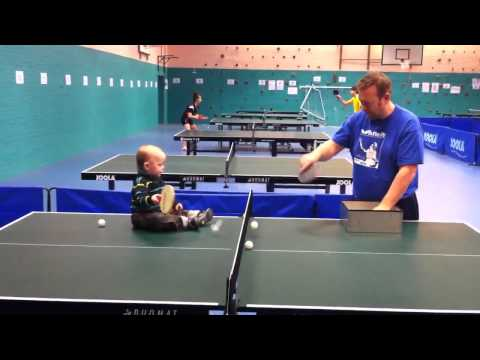

In [1]:
%autosave 0
from IPython.display import YouTubeVideo
YouTubeVideo("1n5uFGk2pnc")

# Getting Started

It is assumed that you followed the [local installation guide of the NRP](https://bitbucket.org/hbpneurorobotics/neurorobotics-platform).

All the configuration files and the python scripts specific to an experiment are located in the folder **Experiments/** (except the brain and the robot which are located in **Models/**). Let's make a copy of the tutorial:

```bash
cd $HBP/Experiments/
cp -r tutorial_baseball_exercise my_first_experiment
cd my_first_experiment
mv ExDTutorialBaseballExercise.exc ExDMyFirstExperiment.exc
```

The important files are:
* **tutorial_baseball.ipynb**: this notebook
* **ExDMyFirstExperiment.exc**: XML configuration of the experiment
* **tutorial_baseball.bibi**: XML configuration of the brain/body interaction
* **throw_ball.exd**: A state machine referenced in the **.exc**
* ***.py**: Transfer functions referenced in the **.bibi**

Let's edit the **ExDMyFirstExperiment.exc** to change the name of the experiment:
```bash
sed -i "s/<name>.*<\/name>/<name>My First Experiment<\/name>/g" ExDMyFirstExperiment.exc
```

In the following exercises, we will edit the transfer functions and state machine through the Neurorobotics Platform editors. If you want to persist your edits, make sure to **download** your modified code to the respective files in the  **my_first_experiment/** folder.

## Open your own notebook

Close this notebook by closing this tab, then CTRL+C your cle-virtual-coach line in your terminal.
Go to your fresh experiment folder and launch jupyter from there

# Exercise 1: Setting up the experiment interactively

Start the NRP with the following commands:
```shell
cle-nginx
cle-start
cle-frontend
```
and launch the experiment **My First Experiment** that you just created.

The experiment contains an iCub Robot in an empty world. Click the play button, nothing happens.
We will now implement the components one by one to have our iCub playing baseball controlled by a spiking neural network.

## Graphical settings - tune your rendering quality 

Open the **graphical settings** editor. In **Quality**, try setting antialiasing and shadows and see if this does not harm performance on your computer.
In **Environment**, test some skies and keep the one you like.

## Brain editor - Read how the brain is defined 

The PyNN script you read defines neuron populations.
In this experiment, the brain has 21 neurons and 2 populations. Population **sensors** defines sensory neurons, population **motors** motor neurons.

Open the **brain visualizer** to display your brain in 3D. Note that neuron positions are dynamically defined.

Try to change n_sensors to 5000, apply and see the changes in **brain visualizer**.
Change it back to 20 and apply.

## State Machine editor - Throwing balls

The first step is to have a ball throwing machine. Since this concerns purely the environment and not the robot, we implement this in a **state machine**.

Open the **NRP editors** (pen button in the toolbar), and select the **State Machine (SMACH)** tab.
Two **States** are defined: one to spawn new ball, the other to remove them when they are too low.

Complete the code where you find the comments
```py
#################################################
# Insert code here:
#################################################
```

Don't forget to click the **Apply** button and **start** the experiment if necessary.

## Transfer Functions editor - Moving the robot to a pre-swing pose - Neuron2Robot 

You should now have an experiment with balls that are being spawned and thrown in the direction of the iCub. We will first move the iCub to a proper swinging position. Since this concerns purely the robot, we implement this in a **transfer function (TF)**. 

Open the **NRP editors** again and select the **Transfer Functions** tab. Every function defined here are called at regular 20ms intervals.

Start with the function **simple_move_robot**. This is a **Neuron2Robot** TF but does not listen to any brain neuron - it simply send motor commands to the robot in open loop.
Move the arm of the robot so that its hand hits the thrown balls.

## Transfer Functions editor - Converting vision to brain activity - Robot2Neuron 

The robot has a brain of 20 sensor neurons and one motor neuron, connected all to all.
You can see the brain code in the **Brain Editor**. You can also visualize the neurons and their activity with the **brain visualizer** in the toolbar.

We want the camera images sensed by the robot to activate the sensor neurons. For this purpose, we will use a **Robot2Neuron** transfer function. Go to the function **grab_image** and activate the sensor neurons with respect to the difference in green values.

You can see what the robot see with the **generic image viewer** and the brain activity of a neuronal population with the **spiketrain**. The population displayed is defined in the **NeuronMonitor** transfer function and is set to the sensors population initially.

## Transfer Functions editor - Converting brain activity to action - Neuron2Robot 

The input neurons should now spike with respect to the positive difference of green in images.
We now want to make the robot arm swing with respect to the motor neuron activation. Implement the **Neuron2Robot** transfer function, here named **swing**.

## Environment editor - build a nicer environment

Open the **environment editor** and select **Furniture**. Add a ping pong trainer robot and place it approximately at the origin of the ball's trajectory (you might have to move the trainer below ground).
Assemble enclosing walls using **Concrete Wall** and **Wood Wall** in **Construction**. You can use the **snap** option in the **object inspector** to move walls around and snap them to other wall parts.

## Save your work

Reopen the **Transfer Functions** and **State Machine** editors and download the code to your experiment's folder. Replace files that are already there.
Unfortunately, environment changes can not be saved and reloaded for now.



# Exercise 2: Offline analysis and optimization with virtual coach

In the first exercise, you interactively built your experiment so that it works with some hardcoded parameters.
In this exercise, we will run the experiment offline with the **Virtual Coach** to:
* Visualize some data
* Optimize some hardcoded parameters
You will see that the **Virtual Coach** has an API that replaces everything you did mannually in the first exercise: launch an experiment, start it, add a transfer function, set the brain,...

For this part of the notebook, you will need some extra libraries:
```
pip install --user pandas matplotlib
```

Let's import the **Virtual Coach**. Make sure you started your jupyter notebook with the command
```bash
cle-virtual-coach jupyter notebook
```

In [1]:
# disable global logging from the virtual coach
import logging
logging.disable(logging.INFO)
logging.getLogger('rospy').propagate = False
logging.getLogger('rosout').propagate = False

In [2]:
# log into the virtual coach, update with your credentials
try:
    from hbp_nrp_virtual_coach.virtual_coach import VirtualCoach
    vc = VirtualCoach(environment='local')
except ImportError as e:
    print(e)
    print("You have to start this notebook with the command:\
          cle-virtual-coach jupyter notebook")
    raise e

## First steps with the Virtual Coach

The virtual coach launch experiments return a well-documented simulation object with which you can interact:

In [3]:
sim = vc.launch_experiment('ExDMyFirstExperiment')

In [4]:
methods = [method for method in dir(sim) if not method.startswith('_')]
print('Available method on the simulation object:\n{}'.format('\n'.join(methods)))

Available method on the simulation object:
add_state_machine
add_transfer_function
delete_state_machine
delete_transfer_function
edit_brain
edit_populations
edit_state_machine
edit_transfer_function
get_brain
get_csv_data
get_populations
get_state
get_state_machine
get_transfer_function
launch
pause
print_csv_file_names
print_state_machines
print_transfer_functions
register_status_callback
reset
start
stop


In [5]:
sim.register_status_callback?

If you have the frontend running, you can see that there is a running instance of this experiment if you click on it.
You can stop the experiment either with the frontend or with the virtual coach:

In [6]:
sim.stop()

## Visualization and optimization

In the coming cells, you will have to use the virtual coach to optimize a metric by running the expriments multiple times.

Specifically, we will try to find the best synaptic weight between the input and the output populations.
The objective we try to maximize is the absolute **x** position of the ball (the ball is fired in the negative **x** direction, c.f. the StateMachine).

For this purpose we need:
1. the brain to be parametrizable
2. a way to access data from the experiment (the ball position)

### The brain

Here is the brain file from the **tutorial_baseball_exercise**. Note that the synaptic weight is replaced with the template parameter **{syn_weight}**:

In [7]:
brain_template = '''
# -*- coding: utf-8 -*-
"""
Tutorial brain for the baseball experiment
"""

# pragma: no cover
__author__ = 'Jacques Kaiser'

from hbp_nrp_cle.brainsim import simulator as sim
import numpy as np

n_sensors = 20
n_motors = 1

sensors = sim.Population(n_sensors, cellclass=sim.IF_curr_exp())
motors = sim.Population(n_motors, cellclass=sim.IF_curr_exp())
sim.Projection(sensors, motors, sim.AllToAllConnector(),
               sim.StaticSynapse(weight={syn_weight}))
'''

### The (additional) transfer function

To record data from the experiment, we add a special type of transfer functions: **MapCSVRecorder**..
You could also add this transfer functions as a python file in the **Experiments/my_first_experiment** folder and reference it in the **.bibi**, the results would be identical.

In [8]:
record_ball_tf = \
'''
# Imported Python Transfer Function
import numpy as np
import sensor_msgs.msg

@nrp.MapCSVRecorder("ball_recorder", filename="ball_position.csv",
                    headers=["Time", "px", "py", "pz"])
@nrp.Robot2Neuron()
def record_ball_csv(t, ball_recorder):
    from rospy import ServiceProxy
    from gazebo_msgs.srv import GetModelState

    model_name = 'ball'
    state_proxy = ServiceProxy('/gazebo/get_model_state',
                                    GetModelState, persistent=False)
    ball_state = state_proxy(model_name, "world")

    if ball_state.success:
        current_position = ball_state.pose.position
        ball_recorder.record_entry(t,
                                   current_position.x, 
                                   current_position.y, 
                                   current_position.z)
'''

## Running the experiment with default synaptic weight

Run the experiment with the default synaptic weight, and save the resulting CSV file

In [10]:
import csv
import tempfile
import os

# this name has to match the name passed in the CSV transfer function
csv_name = 'ball_position.csv'
    
def save_position_csv(sim, datadir):
    with open(os.path.join(datadir, csv_name), 'wb') as f:
        cf = csv.writer(f)
        #################################################
        # Insert code here:
        # get the CSV data from the simulation
        #################################################
        cf.writerows(csv_data)
    
# The function make_on_status() returns a on_status() function
# This is called a "closure": 
# it is here used to pass the sim and datadir objects to on_status()
def make_on_status(sim, datadir):
    def on_status(msg):
        print("Current simulation time: {}".format(msg['simulationTime']))
        if msg['simulationTime'] == 5.0 and sim.get_state() is not 'stopped':
            #################################################
            # Insert code here:
            # 1) pause the simulation, 
            # 2) save the CSV file
            # 3) stop the simulation 
            #################################################
            save_position_csv(sim, datadir)
            print("Trial terminated - saved CSV in {}".format(datadir))
            
    return on_status
        
def run_experiment(datadir, brain_params={'syn_weight': 1.0}):
    #################################################
    # Insert code here:
    # 1) launch the experiment
    # 2) add the status callback
    # 3) add the parametrized brain file
    # 4) add the extra CSV TF
    # 5) start the simulation
    #################################################
    brain_file = brain_template.format(**brain_params)
    
    sim.start()
    return sim
    
tmp_folder = tempfile.mkdtemp()
sim=run_experiment(datadir=tmp_folder)

If everything went fine, the csv data got saved to a **tempdir** in your **/tmp/**:

In [12]:
csv_file = os.path.join(tmp_folder, csv_name)
print("Recorded the following csv file: {}".format(csv_file))

Recorded the following csv file: /tmp/tmp8C7Ubt/ball_position.csv


## Plotting the CSV data

Let's use [pandas](http://pandas.pydata.org/) to read the csv file, create dataframes and plot it.
You will need to install pandas:

```bash
pip install pandas
```

Let's read the csv file with pandas:

In [14]:
import pandas
ball_csv = pandas.read_csv(csv_file)
ball_csv

,Time,px,py,pz
0,0.00,3.000000,-0.280000,0.697942
1,0.02,2.981579,-0.280000,0.697490
2,0.04,2.928070,-0.280000,0.703645
3,0.06,2.839474,-0.280000,0.716406
4,0.08,2.715789,-0.280000,0.735773
5,0.10,2.557018,-0.280000,0.761747
6,0.12,2.381579,-0.280000,0.788800
7,0.14,2.206140,-0.280000,0.811934
8,0.16,2.030702,-0.280000,0.831147
9,0.18,1.855263,-0.280000,0.846441


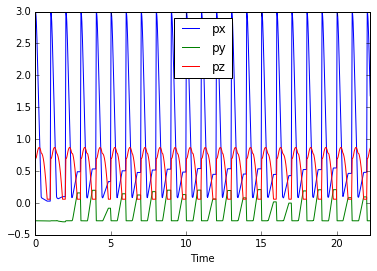

In [17]:
%matplotlib inline
ball_csv=ball_csv.set_index('Time')
ball_csv.plot()

You can see that ball position is initially high when the ball is created, it then decreases until it hits the robot.

## Optimizing the synaptic weight

We define the objective function as being the accumulated **x** position. Let's run many trials with different synaptic weights and see the evolution of accumulated **x** position. For example, with this current trial of synaptic weight 1.0, the accumulated **x** is:

In [18]:
ball_csv.px.sum()

991.58208994771132

Run the experiment again with different synaptic weights and plot the results.

In [19]:
import numpy as np
n_trials = 10
trial_weights = np.linspace(0., 1.5, n_trials)
trial_ball_csv = [tempfile.mkdtemp() for i in range(n_trials)]
#################################################
# Insert code here:
# 1) run the experiments with all the trial_weights
# 2) compute the fitness of each trial
# 3) plot your results
#################################################

## Going further

In this second exercise, you saw how to run the same experiment many times to optimize a single synaptic weight.
Despite that the experiment was simple, you can keep the same workflow for your use case:
* Try to optimize different metric by recording different data in your CSV
* Try to optimize different parameters (e.g., many synaptic weights or learning rules hyperparameters)
* Try to use a different optimization algorithm (evolution strategy, ...)